# 1. Tải thư viện và import nó 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# 2 Kiểm tra sơ bộ data 

In [3]:
vinmec_df = pd.read_json(r"C:\Users\Admin\Desktop\vinmec.json")
longchau_df = pd.read_json(r"C:\Users\Admin\Desktop\longchau.json")

In [4]:
vinmec_df.isnull().sum(), longchau_df.isnull().sum()

(url        0
 title      0
 content    0
 tag        0
 dtype: int64,
 url        0
 title      0
 content    0
 tag        0
 dtype: int64)

In [5]:
# Check độ dài
vinmec_df['word_count'] = vinmec_df['content'].apply(lambda x: len(str(x).split()))
vinmec_df['char_count'] = vinmec_df['content'].apply(lambda x: len(str(x)))
longchau_df['word_count'] = longchau_df['content'].apply(lambda x: len(str(x).split()))
longchau_df['char_count'] = longchau_df['content'].apply(lambda x: len(str(x)))


In [6]:
vinmec_df 

,url,title,content,tag,word_count,char_count
0,https://www.vinmec.com/vie/bai-viet/cang-co-du...,Căng cơ đùi: Nguyên nhân và các phương pháp đi...,Căng cơ đùi có thể coi là một trong những chấn...,Chấn thương chỉnh hình - Y khoa,1091,4977
1,https://www.vinmec.com/vie/bai-viet/chuot-rut-...,Chuột rút cơ lưng: Nguyên nhân và biện pháp ph...,Chuột rút cơ lưng có thể gây đau đớn và ảnh hư...,Chấn thương chỉnh hình - Y khoa,1367,6288
2,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương đòn bao lâu thì tháo nẹp và những lư...,Gãy xương đòn bao lâu thì tháo nẹp là câu hỏi ...,Chấn thương chỉnh hình - Y khoa,1135,5256
3,https://www.vinmec.com/vie/bai-viet/cach-chua-...,Cách chữa viêm khớp cùng chậu tại nhà: Phương ...,Cách chữa viêm khớp cùng chậu tại nhà như bài ...,Chấn thương chỉnh hình - Y khoa,1413,6456
4,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương cẳng tay bao lâu thì lành và những đ...,Gãy xương cẳng tay bao lâu thì lành là điều mà...,Chấn thương chỉnh hình - Y khoa,883,3994
...,...,...,...,...,...,...
38542,https://www.vinmec.com/vie/bai-viet/di-ung-pol...,"Dị ứng Polyester: Nguyên nhân, triệu chứng và ...",Dị ứng polyester là bệnh lý tương đối phổ biến...,Miễn dịch dị ứng,879,4008
38543,https://www.vinmec.com/vie/bai-viet/viem-xoang...,"Viêm xoang mũi dị ứng: Nguyên nhân, triệu chứn...",Viêm xoang mũi dị ứng là một tình trạng phổ bi...,Miễn dịch dị ứng,1486,6885
38544,https://www.vinmec.com/vie/bai-viet/roi-loan-m...,"Rối loạn miễn dịch: Các loại bệnh, nguyên nhân...",Rối loạn miễn dịch là một tình trạng bệnh mà n...,Miễn dịch dị ứng,1112,5268
38545,https://www.vinmec.com/vie/bai-viet/di-ung-nic...,Dị ứng nicotin: Các triệu chứng và cách điều trị,Dị ứng nicotin là một loại dị ứng với thành ph...,Miễn dịch dị ứng,600,2742


In [7]:
longchau_df 

,url,title,content,tag,word_count,char_count
0,https://nhathuoclongchau.com.vn/bai-viet/thuoc...,Thuốc kháng sinh điều trị viêm tai giữa và nhữ...,"Viêm tai giữa là căn bệnh phổ biến, đặc biệt l...",Kiến thức y khoa,1267,5844
1,https://nhathuoclongchau.com.vn/bai-viet/viem-...,Viêm tai giữa có lây không? Cách phòng ngừa bệ...,"Viêm tai giữa là căn bệnh khá phổ biến, đặc bi...",Kiến thức y khoa,1249,5637
2,https://nhathuoclongchau.com.vn/bai-viet/sot-x...,Sốt xuất huyết không còn theo mùa: Biến đổi kh...,"Sốt xuất huyết không còn là bệnh theo mùa, khi...",Kiến thức y khoa,1228,5737
3,https://nhathuoclongchau.com.vn/bai-viet/cac-b...,Các biện pháp phòng bệnh Covid-19 chủng mới,"Trong thời gian gần đây, dịch Covid-19 lại tiế...",Kiến thức y khoa,1681,7932
4,https://nhathuoclongchau.com.vn/bai-viet/viem-...,Viêm phổi do Acinetobacter baumannii có nguy h...,Viêm phổi do Acinetobacter baumannii là một tr...,Kiến thức y khoa,1348,6636
...,...,...,...,...,...,...
33430,https://nhathuoclongchau.com.vn/bai-viet/nhung...,Các dấu hiệu viêm loét dạ dày mà bạn cần biết,Viêm loét dạ dày là một căn bệnh thường gặp tr...,Kiến thức y khoa,1187,5424
33431,https://nhathuoclongchau.com.vn/bai-viet/4-dau...,Các triệu chứng rối loạn tiền đình tuyệt đối k...,Rối loạn tiền đình thường kết hợp với một số b...,Kiến thức y khoa,1423,6641
33432,https://nhathuoclongchau.com.vn/bai-viet/sun-k...,Nguyên nhân gây mất sụn khớp là gì? Sụn khớp c...,Tình trạng thoái hóa khớp xuất hiện hầu hết ở ...,Kiến thức y khoa,1656,7664
33433,https://nhathuoclongchau.com.vn/bai-viet/dau-h...,Dấu hiệu cảnh báo vô sinh ở nữ giới,"Tiếng khóc trẻ thơ chính là niềm vui, niềm hạn...",Kiến thức y khoa,632,2866


# 3. Vẽ biểu đồ 

In [8]:
vinmec_df.drop(['word_count', 'char_count'], axis=1, inplace=True)
longchau_df.drop(['word_count', 'char_count'], axis=1, inplace=True)

In [9]:
df = pd.concat([vinmec_df, longchau_df], ignore_index=True)

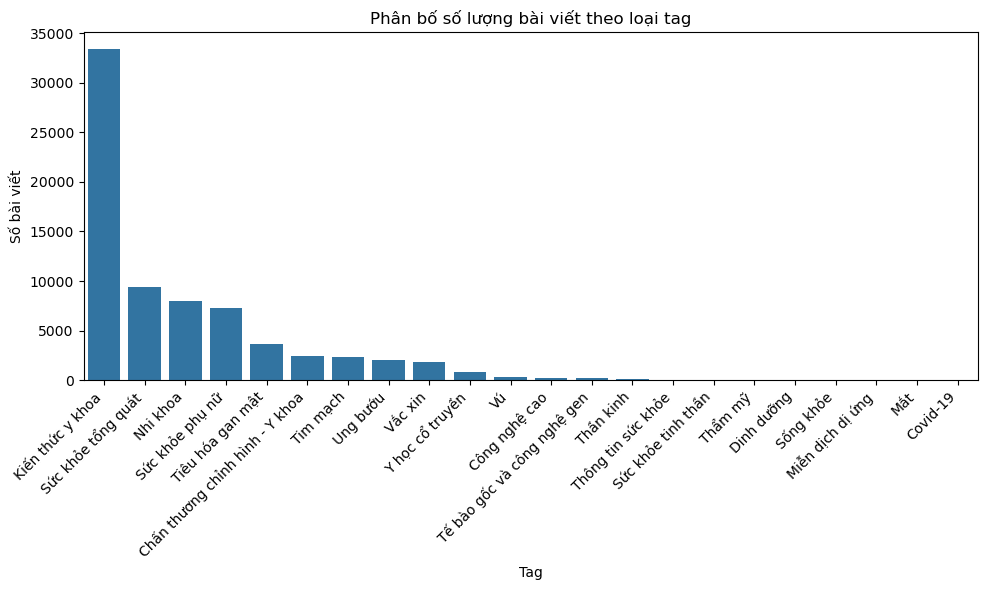

In [10]:
# Đếm số bài viết theo tag
tag_counts = df['tag'].value_counts()

# --- Biểu đồ cột ---
plt.figure(figsize=(10,6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Phân bố số lượng bài viết theo loại tag')
plt.ylabel('Số bài viết')
plt.xlabel('Tag')
plt.tight_layout()
plt.show()

In [11]:
# Tách các bài viết là dạng Question and Answer 
df_qa = df[df['content'].str.startswith("Hỏi\nChào bác sĩ", na=False)].copy()
# Tách các bài viết còn lại là dạng article 
df_article = df[~df['content'].str.startswith("Hỏi\nChào bác sĩ", na=False)].copy()

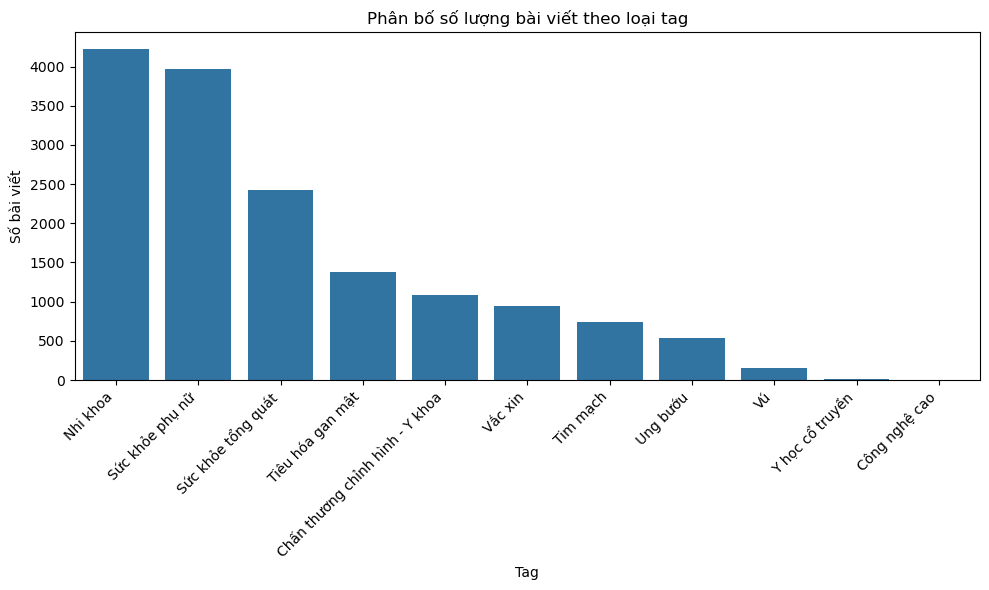

In [12]:
# Đếm số bài viết theo tag
tag_counts = df_qa['tag'].value_counts()

# --- Biểu đồ cột ---
plt.figure(figsize=(10,6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Phân bố số lượng bài viết theo loại tag')
plt.ylabel('Số bài viết')
plt.xlabel('Tag')
plt.tight_layout()
plt.show()

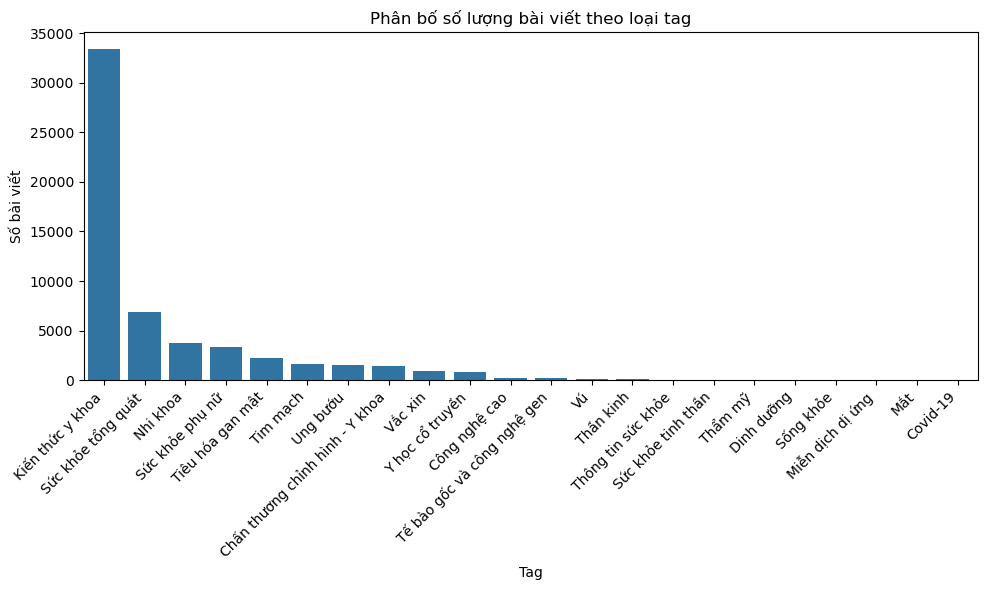

In [13]:
# Đếm số bài viết theo tag
tag_counts = df_article['tag'].value_counts()

# --- Biểu đồ cột ---
plt.figure(figsize=(10,6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Phân bố số lượng bài viết theo loại tag')
plt.ylabel('Số bài viết')
plt.xlabel('Tag')
plt.tight_layout()
plt.show()

# 4. Xử lý từng df và thêm meta data

1. Xóa bỏ dấu "\n"
2. Tiến hành reformat lại các dictionary về thành format chuẩn 


## 1. Xử lý df_qa 

In [14]:
# Thay thế \n trong cột content bằng dấu cách
df_qa.loc[:, 'content'] = df_qa['content'].str.replace('\n', ' ', regex=False)

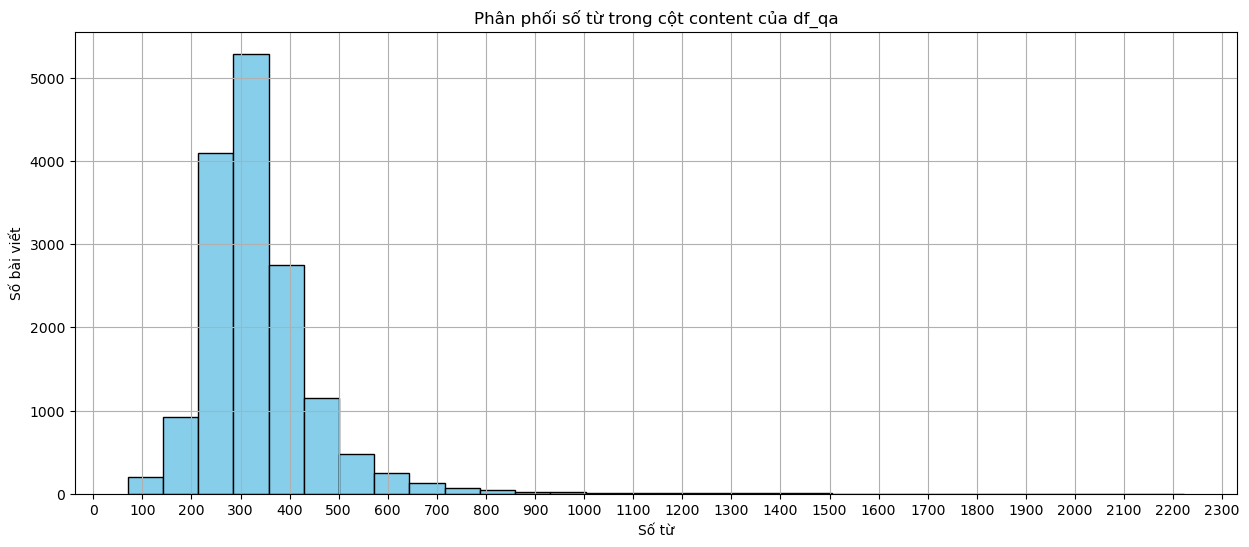

In [20]:
# Đếm số từ cho từng dòng trong cột 'content'
word_counts = df_qa['content'].str.split().str.len()

# Vẽ biểu đồ histogram
plt.figure(figsize=(15, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Phân phối số từ trong cột content của df_qa')
plt.xlabel('Số từ')
plt.ylabel('Số bài viết')
plt.xticks(np.arange(0, max(word_counts) + 100, 100))
plt.grid(True)
plt.show()

In [23]:
df_qa['content']

300      Hỏi Chào bác sĩ, Em là nam, sinh năm 2005. Hồi...
301      Hỏi Chào bác sĩ, Cháu thường xuyên bị đau gót ...
302      Hỏi Chào bác sĩ, Em mới mổ xương đòn được 1 nă...
303      Hỏi Chào bác sĩ, Em bị đứt dây thần kinh trụ c...
304      Hỏi Chào bác sĩ, Cháu bị gãy đầu dưới xương qu...
                               ...                        
38296    Hỏi Chào bác sĩ, tôi đang có ý định sử dụng th...
38297    Hỏi Chào bác sĩ, tôi đang sử dụng thuốc Đông Y...
38331    Hỏi Chào bác sĩ, Tôi bị đau dạ dày mãn tính, h...
38332    Hỏi Chào bác sĩ, Tôi đã sử dụng thuốc Đông y đ...
38333    Hỏi Chào bác sĩ, tôi bị bệnh khớp lâu năm và h...
Name: content, Length: 15482, dtype: object

In [24]:
df_qa['content'] = df_qa['content'].str.replace(r'^Hỏi\s*Chào bác sĩ,?\s*', '', regex=True)

In [25]:
for text in df_qa['content'].head(5):
    print(text)
    print('-' * 80)

Em là nam, sinh năm 2005. Hồi đầu tháng 6, em có bị “bong điểm bám dây chằng chéo trước”, bác sĩ chỉ định mổ đóng đinh và đến nay cũng được 4 tháng rưỡi, em muốn tập thể dục để nâng cao sức khoẻ. Bác sĩ cho em hỏisau mổ bong điểm bám dây chằng chéo trước bao lâu có thể tập thể dục?Bao lâu em có thể chạy bộ và hoạt động chạy nhảy bình thường được? Em có cần bỏ đinh ra mới hoạt động bình thường được không? Em cảm ơn. Khách hàng ẩn danh Trả lời Được giải đáp bởiThạc sĩ, Bác sĩ Hoàng Xuân Hùng- Khoa Ngoại tổng hợp, Bệnh viện Đa khoa Quốc tế Vinmec Nha Trang. Chào bạn, Với câu hỏi “Sau mổ bong điểm bám dây chằng chéo trước bao lâu có thể tập thể dục?”, bác sĩ xin giải đáp như sau: Về tình trạng của bạn nếu ca phẫu thuật thuận lợi và đúng phương pháp thì bạn có thể tập vận động từ 4 - 6 tuần sau mổ, bắt đầu đặt chân chịu lực từ tuần thứ 6 và sau 8 tuần cần được mở hết tầm vận động. Bạn đã phẫu thuật 4 tháng hơn nên đi khám lại để bác sĩ phẫu thuật có lời khuyên cụ thể hơn. Nếu bạn còn thắc m

In [26]:
pattern = r"Nếu bạn còn thắc mắc về.*?mọi lúc mọi nơi ngay trên ứng dụng\."
df_qa['content'] = df_qa['content'].str.replace(pattern, '', regex=True)

In [27]:
df_qa.loc[:, 'content'] = df_qa['content'].str.replace(r'Khách hàng ẩn danh.*?\.', '', regex=True)

In [28]:
df_qa.loc[:, 'content'] = df_qa['content'].str.replace(r' Chào bạn,.*?(?=bác sĩ xin giải đáp như sau)', '', regex=True)

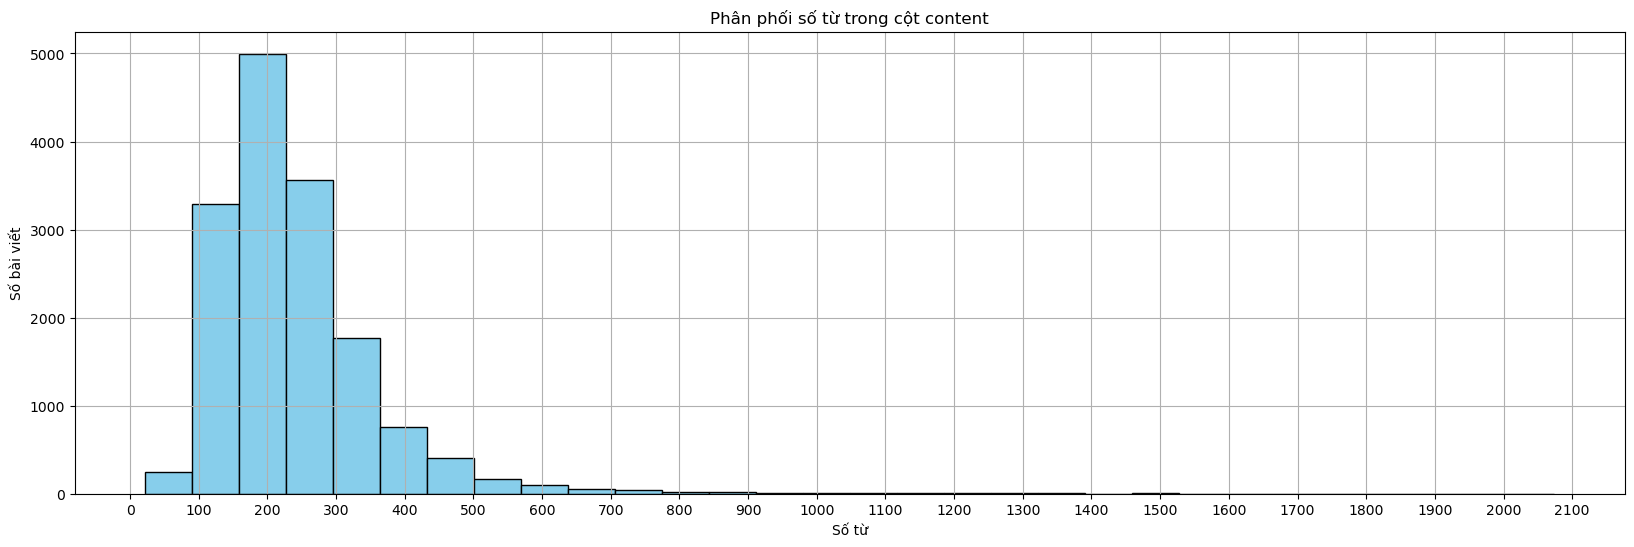

In [30]:
# Đếm số từ cho từng dòng trong cột 'content'
word_counts = df_qa['content'].str.split().str.len()

# Vẽ biểu đồ histogram
plt.figure(figsize=(20, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Phân phối số từ trong cột content')
plt.xlabel('Số từ')
plt.ylabel('Số bài viết')
plt.xticks(np.arange(0, max(word_counts) + 100, 100))
plt.grid(True)
plt.show()

In [31]:
# Thêm cột này ở cuối để khi merge lại với cái df_article thì sẽ phân biệt dễ hơn 
df_qa['type'] = 'qa'

In [32]:
df_qa.head()

,url,title,content,tag,type
300,https://www.vinmec.com/vie/bai-viet/sau-mo-bon...,Sau mổ bong điểm bám dây chằng chéo trước bao ...,"Em là nam, sinh năm 2005. Hồi đầu tháng 6, em ...",Chấn thương chỉnh hình - Y khoa,qa
301,https://www.vinmec.com/vie/bai-viet/dau-got-ch...,Đau gót chân và bàn chân là bệnh gì?,Cháu thường xuyên bị đau gót chân và bàn chân....,Chấn thương chỉnh hình - Y khoa,qa
302,https://www.vinmec.com/vie/bai-viet/co-mo-rut-...,Có thể mổ rút nẹp xương đòn sau 2 năm được không?,"Em mới mổ xương đòn được 1 năm 4 tháng, em đan...",Chấn thương chỉnh hình - Y khoa,qa
303,https://www.vinmec.com/vie/bai-viet/dut-day-ki...,Đứt dây thần kinh trụ cổ tay nên tập luyện hồi...,Em bị đứt dây thần kinh trụ cổ tay phải từ giữ...,Chấn thương chỉnh hình - Y khoa,qa
304,https://www.vinmec.com/vie/bai-viet/gay-dau-du...,Gãy đầu dưới xương quay có sao không?,Cháu bị gãy đầu dưới xương quay nay đã được 4 ...,Chấn thương chỉnh hình - Y khoa,qa


## 2. Xử lý df_article 

In [33]:
# Thay thế \n trong cột content bằng dấu cách
df_article.loc[:, 'content'] = df_article['content'].str.replace('\n', ' ', regex=False)

In [34]:
df_article

,url,title,content,tag
0,https://www.vinmec.com/vie/bai-viet/cang-co-du...,Căng cơ đùi: Nguyên nhân và các phương pháp đi...,Căng cơ đùi có thể coi là một trong những chấn...,Chấn thương chỉnh hình - Y khoa
1,https://www.vinmec.com/vie/bai-viet/chuot-rut-...,Chuột rút cơ lưng: Nguyên nhân và biện pháp ph...,Chuột rút cơ lưng có thể gây đau đớn và ảnh hư...,Chấn thương chỉnh hình - Y khoa
2,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương đòn bao lâu thì tháo nẹp và những lư...,Gãy xương đòn bao lâu thì tháo nẹp là câu hỏi ...,Chấn thương chỉnh hình - Y khoa
3,https://www.vinmec.com/vie/bai-viet/cach-chua-...,Cách chữa viêm khớp cùng chậu tại nhà: Phương ...,Cách chữa viêm khớp cùng chậu tại nhà như bài ...,Chấn thương chỉnh hình - Y khoa
4,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương cẳng tay bao lâu thì lành và những đ...,Gãy xương cẳng tay bao lâu thì lành là điều mà...,Chấn thương chỉnh hình - Y khoa
...,...,...,...,...
71977,https://nhathuoclongchau.com.vn/bai-viet/nhung...,Các dấu hiệu viêm loét dạ dày mà bạn cần biết,Viêm loét dạ dày là một căn bệnh thường gặp tr...,Kiến thức y khoa
71978,https://nhathuoclongchau.com.vn/bai-viet/4-dau...,Các triệu chứng rối loạn tiền đình tuyệt đối k...,Rối loạn tiền đình thường kết hợp với một số b...,Kiến thức y khoa
71979,https://nhathuoclongchau.com.vn/bai-viet/sun-k...,Nguyên nhân gây mất sụn khớp là gì? Sụn khớp c...,Tình trạng thoái hóa khớp xuất hiện hầu hết ở ...,Kiến thức y khoa
71980,https://nhathuoclongchau.com.vn/bai-viet/dau-h...,Dấu hiệu cảnh báo vô sinh ở nữ giới,"Tiếng khóc trẻ thơ chính là niềm vui, niềm hạn...",Kiến thức y khoa


In [35]:
# Thêm cột này ở cuối để khi merge lại với cái df_qa thì sẽ phân biệt dễ hơn 
df_article['type'] = 'article'

In [36]:
df_article.head()

,url,title,content,tag,type
0,https://www.vinmec.com/vie/bai-viet/cang-co-du...,Căng cơ đùi: Nguyên nhân và các phương pháp đi...,Căng cơ đùi có thể coi là một trong những chấn...,Chấn thương chỉnh hình - Y khoa,article
1,https://www.vinmec.com/vie/bai-viet/chuot-rut-...,Chuột rút cơ lưng: Nguyên nhân và biện pháp ph...,Chuột rút cơ lưng có thể gây đau đớn và ảnh hư...,Chấn thương chỉnh hình - Y khoa,article
2,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương đòn bao lâu thì tháo nẹp và những lư...,Gãy xương đòn bao lâu thì tháo nẹp là câu hỏi ...,Chấn thương chỉnh hình - Y khoa,article
3,https://www.vinmec.com/vie/bai-viet/cach-chua-...,Cách chữa viêm khớp cùng chậu tại nhà: Phương ...,Cách chữa viêm khớp cùng chậu tại nhà như bài ...,Chấn thương chỉnh hình - Y khoa,article
4,https://www.vinmec.com/vie/bai-viet/gay-xuong-...,Gãy xương cẳng tay bao lâu thì lành và những đ...,Gãy xương cẳng tay bao lâu thì lành là điều mà...,Chấn thương chỉnh hình - Y khoa,article


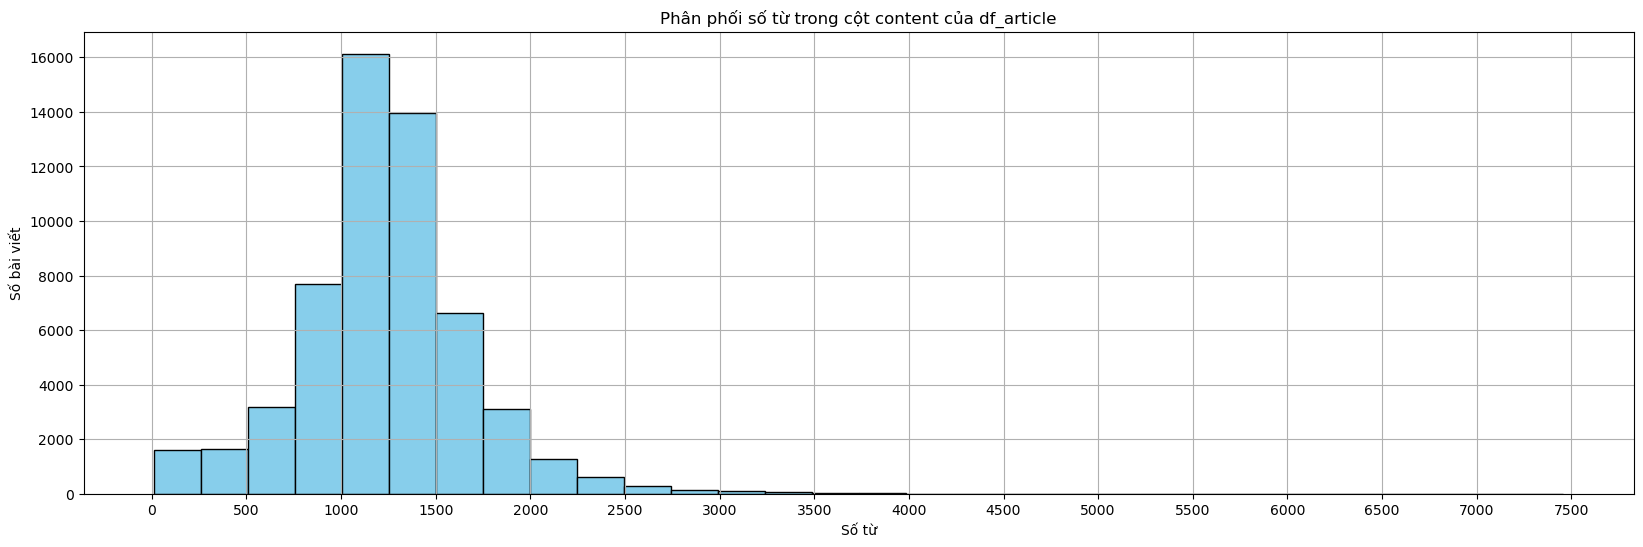

In [21]:
# Đếm số từ cho từng dòng trong cột 'content'
word_counts = df_article['content'].str.split().str.len()

# Vẽ biểu đồ histogram
plt.figure(figsize=(20, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Phân phối số từ trong cột content của df_article')
plt.xlabel('Số từ')
plt.ylabel('Số bài viết')
plt.xticks(np.arange(0, max(word_counts) + 500, 500))
plt.grid(True)
plt.show()

In [38]:
import json

# Chuyển DataFrame sang list of dicts
data_article = df_article.to_dict(orient='records')
data_qa = df_qa.to_dict(orient='records')

# Gộp 2 list lại
combined_data = data_article + data_qa

# Ghi ra file df.json
with open('df.json', 'w', encoding='utf-8') as f:
    json.dump(combined_data, f, ensure_ascii=False, indent=2)